<a href="https://colab.research.google.com/github/veropetit/PHYS633-S2022/blob/main/L13-LimbDarkening/13-LimbDarkening-template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="purple">13-LimbDarkening</font> (template)

We start by importing the modules
* Numpy -- operations on arrays and matrixes (and pi)
* Matplotlib pyplot -- plotting library
* Matplotlin patches -- module that enables patches in plots
* Astropy units -- defined quantities with units. We also import the CDS conversions

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 

from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable()

## 1. In class: We can start by creating a polar grid (make sure to execute)

The grid represent the projected disk of a star on the sky, where $\alpha$ is the distance from the center of the disk (let's normalize the edge of the disk by $\alpha=1$), and $\varphi$ is the azimutal angle aroung the center of the disk. 

For later, we will also need the area on the sky represented by each grid point ($\sim\alpha d\alpha d\varphi$), as well as the value of $u$. We saw earlier in the course (when discussing intensity vs flux) that we can relate the value of $u$ and $\alpha$ by 
$$u = (1-\alpha^2)^{1/2}.$$

In [ ]:
# Create a 2D grid in polar coordinates where 
# alpha is the radius from the center of the circle
# phi is the angle around the circle

n_phi = 10 # number of phi angles
n_alpha = 10   # number of radii

alpha = np.linspace(0, 1, n_alpha)
phi = np.radians(np.linspace(0, 360-(360/n_phi), n_phi))


#---------------------------------------
# In class


#alpha_grid = ....



#---------------------------------------
# We will need the projected area dA cos(theta)
# Area of a ring = 2 pi alpha dalpha
# Area of a rind segment = area of ring / number of segments

#area_grid = 2*np.pi * alpha_grid * (1.0/n_alpha) / n_phi

# and the value of u=cos(theta)

#u_grid = (1.0 - alpha_grid **2)**0.5

## 2. In class: Just a quick visualization of the grid

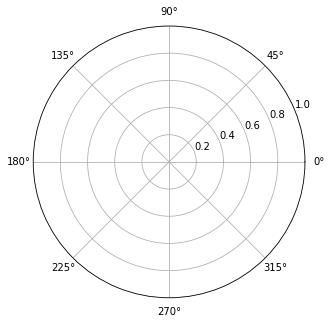

In [ ]:
# We can get a figure in polar coordinate by using a "projection"
fig, ax = plt.subplots(1,1,subplot_kw=dict(projection='polar'), figsize=(5,5))

#------------------------------
# In class




## 3. In class: let's look at the effect of Limb-darkening

**IMPORTANT** Make sure to change the number of $\alpha$ and $\phi$ to 1000 in #1 and re-execute, to get a fine grid. 

> **TODO**: Below, provide an explanation (in words and math) that describes the calculations that we are performing in the code

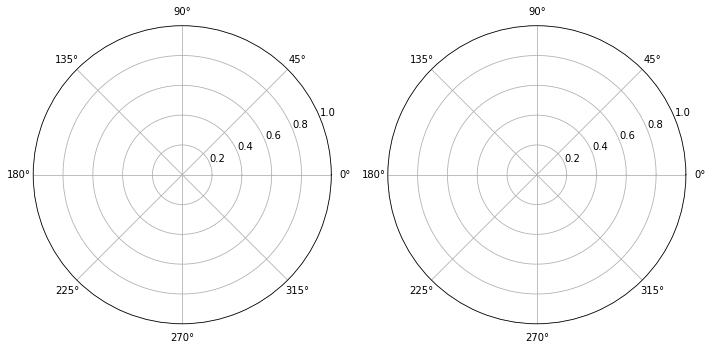

In [ ]:
fig, ax = plt.subplots(1,2,subplot_kw=dict(projection='polar'), figsize=(10,5))

# Loading a colormap
cmap = plt.cm.hot

#--------------------------------------------
# In class

Source_slope = 0.5



# Copy paste, change ax and source function slope



# ---------------------
plt.tight_layout()

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>


## 4. A simple estimate of planet transit

Each point in our polar grid can be transformed into cartesian coodinates, as
$$x = \alpha \cos(\varphi)$$
$$y = \alpha \sin(\varphi)$$

The cartesian equation for a circle if radius $R$ centered on the coordinate $x_o$ and $y_o$ is 
$$(x - x_o)^2 + (y - y_o)^2 = R^2.$$

Therefore, if we place a place a planet anywhere on our star's disk, we can simply set the intensity to zero for every grid point where the following condition is met:
$$(x - x_o)^2 + (y - y_o)^2 \leq R^2!$$

To get the total flux coming out of the star, we can do a numerical integration by doing a sum of the product of $I$ * Area on the disk. (You can convince yourself that this is correct from our discussion of the observed intensity vs observed flux.)

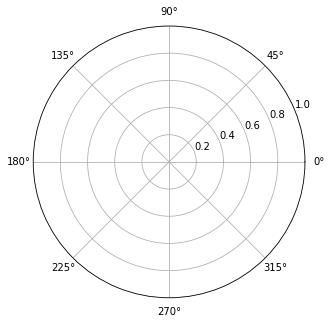

In [ ]:
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(5,5))

Source_slope = 0.5
#I = (1 + Source_slope*u_grid) / (1+Source_slope)

#--------------------------
# In class
# radius ratio of our planet


# Take a copy of the intensity grid

# Where is the planet?





#----------------------------------
# In class, uncomment the following
# Make an image of the star + planet

#co = ax.pcolormesh(phi_grid, alpha_grid, I_transit, cmap=cmap, vmin=0)
#plt.colorbar(co)
#----------------------------------



# Find the total flux coming out of the star without the planet

# Find the total flux coming out of the star with the planet


#----------------------------------
#In class, uncomment the following:

#print('The change is flux will be {:0.3g}'.format(Flux_transit / Flux_o))
#----------------------------------


## 5. At home: by using a series of $x_o$ values, we can make a transit curve!

I provide a piece of code below that will create a transit curve, by making the planet (dark circle) cross the stellar disk horizontally. 

If you study the code, you will see that there are different parameters that you can modify. 

> **TODO**: use the code below to make a study of how the shape of the planet transit changes according to the different parameters. Make sure to include the effect of different limb darkening in your study. 
>
> In the interpretation box below, you will describe the results of your study, using graphs that you will create with the code to support your results. 

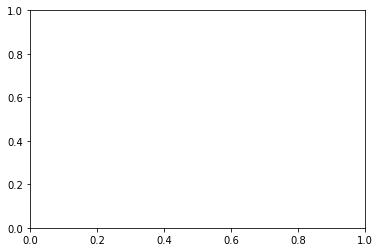

In [ ]:
fig, ax = plt.subplots(1,1)


# Example for one set of parameters:
#-------------------------------------------------
#-------------------------------------------------
Source_slope = 0.5
I = (1 + Source_slope*u_grid) / (1+Source_slope)
Flux_o = np.sum(I * area_grid)
R = 0.1
# Where is the planet?
x0_array = np.linspace(-1-R,1+R,50) # array of xo to mimic a transit
y0 = 0
x_grid = alpha_grid * np.cos(phi_grid)
y_grid = alpha_grid * np.sin(phi_grid)

# The value of the transit are stored in "F_transit"
F_transit = np.array([])    
# Make the planet cross the star:
for x0 in x0_array:
  I_transit = np.copy(I)
  planet = np.where( ( (x_grid - x0)**2 + (y_grid - y0)**2 ) <= R**2  )  
  I_transit[planet] = 0.0
  F_transit = np.append(F_transit, np.sum(I_transit * area_grid))

ax.plot(x0_array, F_transit/Flux_o, c='k') 
#-------------------------------------------------
#-------------------------------------------------



# At home, make a few transit light curves for a set of parameters.
# How does the shape of the transit changes if 
# the radius of the planet, or the limb-darneking of the star changes?



> **TODO**: Describe your results (and interpretation of your results) here. 